In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
Data = pd.read_csv('gps.csv') # , encoding='latin-1')
Data.head()

,App(nominal),Category,Rating(ordinal),Reviews(ratio),Size,Installs,Type,Price(interval),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
print(Data.columns)
'''
Index(['App(nominal)', 'Category', 'Rating(ordinal)', 'Reviews(ratio)', 'Size',
       'Installs', 'Type', 'Price(interval)', 'Content Rating', 'Genres',
       'Last Updated', 'Current Ver', 'Android Ver'],
      dtype='object')

'''

len(Data)
# 10841

Index(['App(nominal)', 'Category', 'Rating(ordinal)', 'Reviews(ratio)', 'Size',
       'Installs', 'Type', 'Price(interval)', 'Content Rating', 'Genres',
       'Last Updated', 'Current Ver', 'Android Ver'],
      dtype='object')


10841

<AxesSubplot: xlabel='Rating(ordinal)', ylabel='Density'>

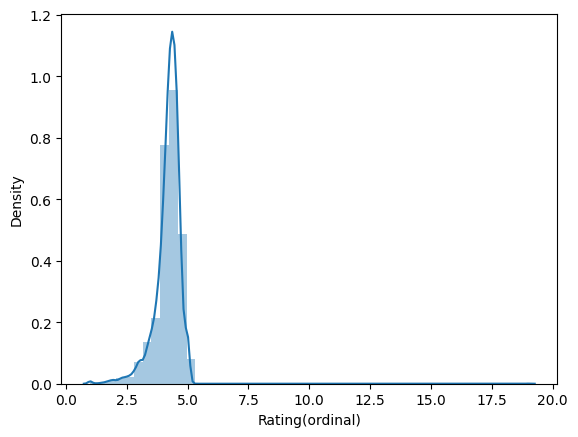

In [4]:

sns.distplot(Data['Rating(ordinal)'])


<AxesSubplot: xlabel='Rating(ordinal)', ylabel='Density'>

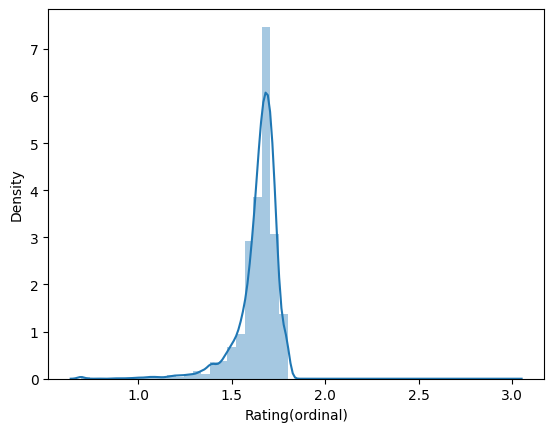

In [6]:
sns.distplot(np.log(Data['Rating(ordinal)'] + 1))
# A log transformation makes the distribution normal. 

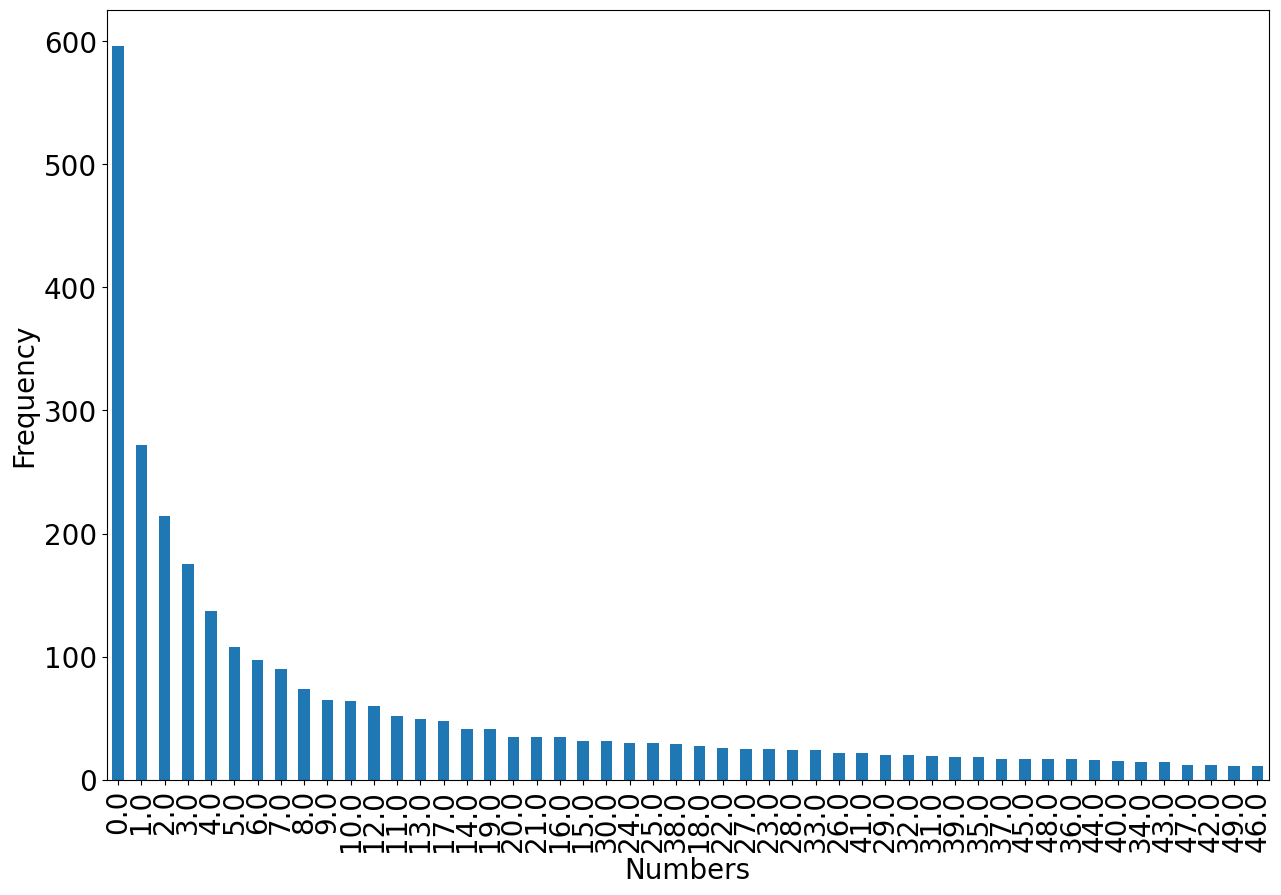

In [54]:
Data['Reviews(ratio)2'] = Data['Reviews(ratio)'].str.replace(r'\D', '')
Data['Reviews(ratio)2'] = Data['Reviews(ratio)2'].astype(float)
fig, ax = plt.subplots(figsize=(15, 10))
Data['Reviews(ratio)2'][Data['Reviews(ratio)2']<50].value_counts().plot(ax=ax, kind='bar', fontsize= 20)
plt.xlabel('Numbers', fontsize=20)
plt.ylabel('Frequency' ,fontsize=20)
plt.show()

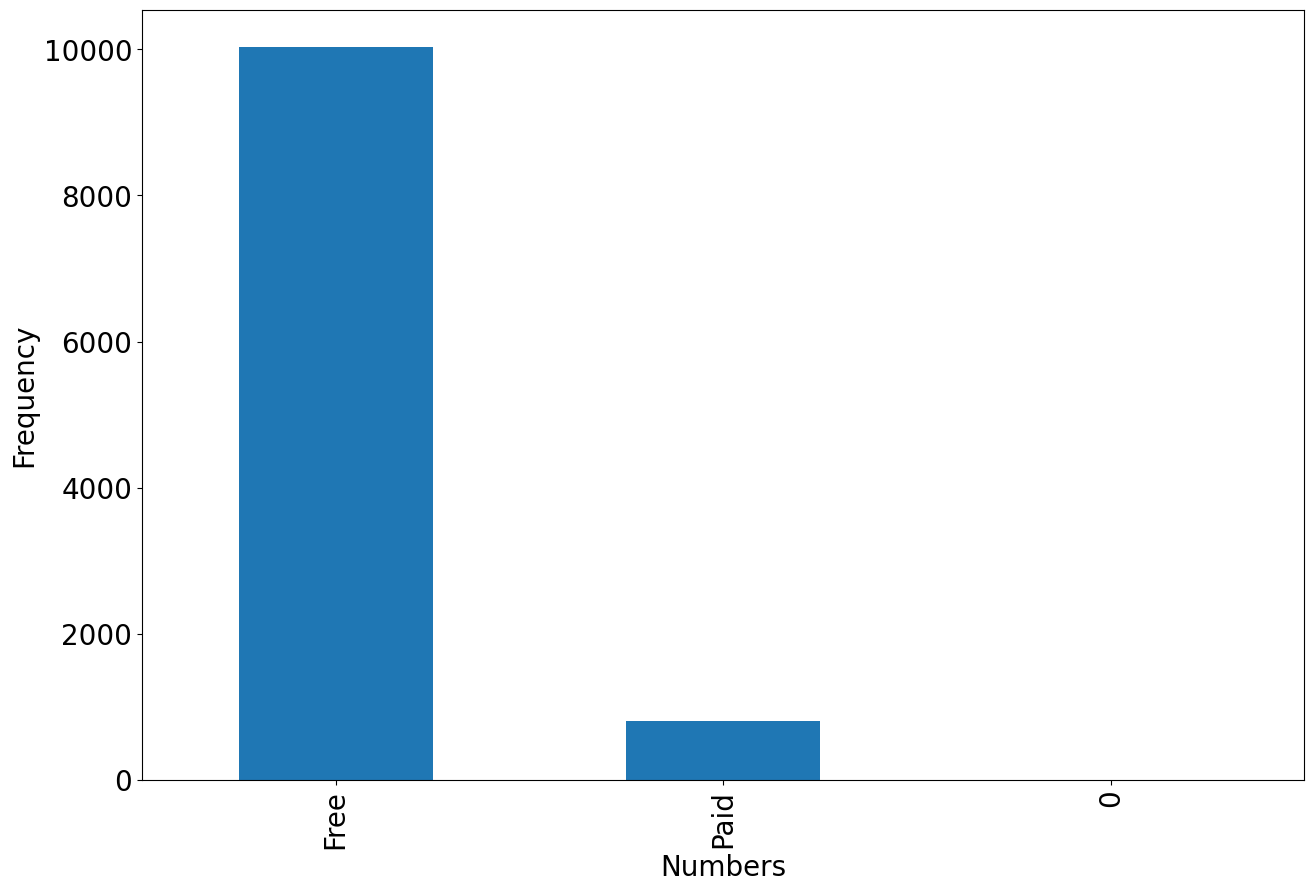

In [55]:
fig, ax = plt.subplots(figsize=(15, 10))
Data['Type'].value_counts().plot(ax=ax, kind='bar', fontsize= 20)
plt.xlabel('Numbers', fontsize=20)
plt.ylabel('Frequency' ,fontsize=20)
plt.show()

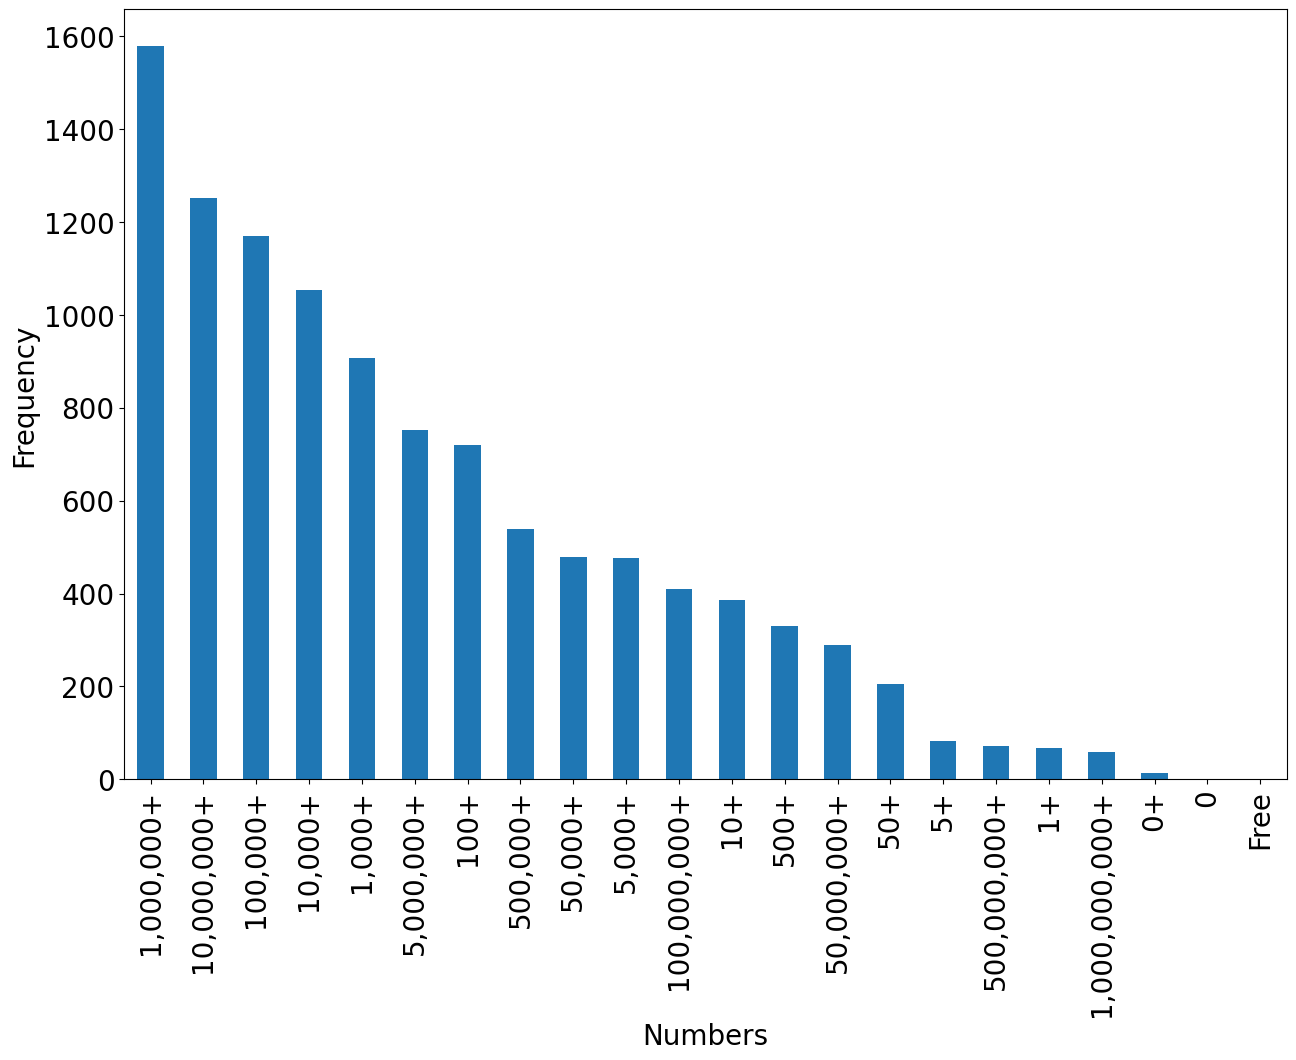

In [56]:
fig, ax = plt.subplots(figsize=(15, 10))
Data['Installs'].value_counts().plot(ax=ax, kind='bar', fontsize= 20)
plt.xlabel('Numbers', fontsize=20)
plt.ylabel('Frequency' ,fontsize=20)
plt.show()

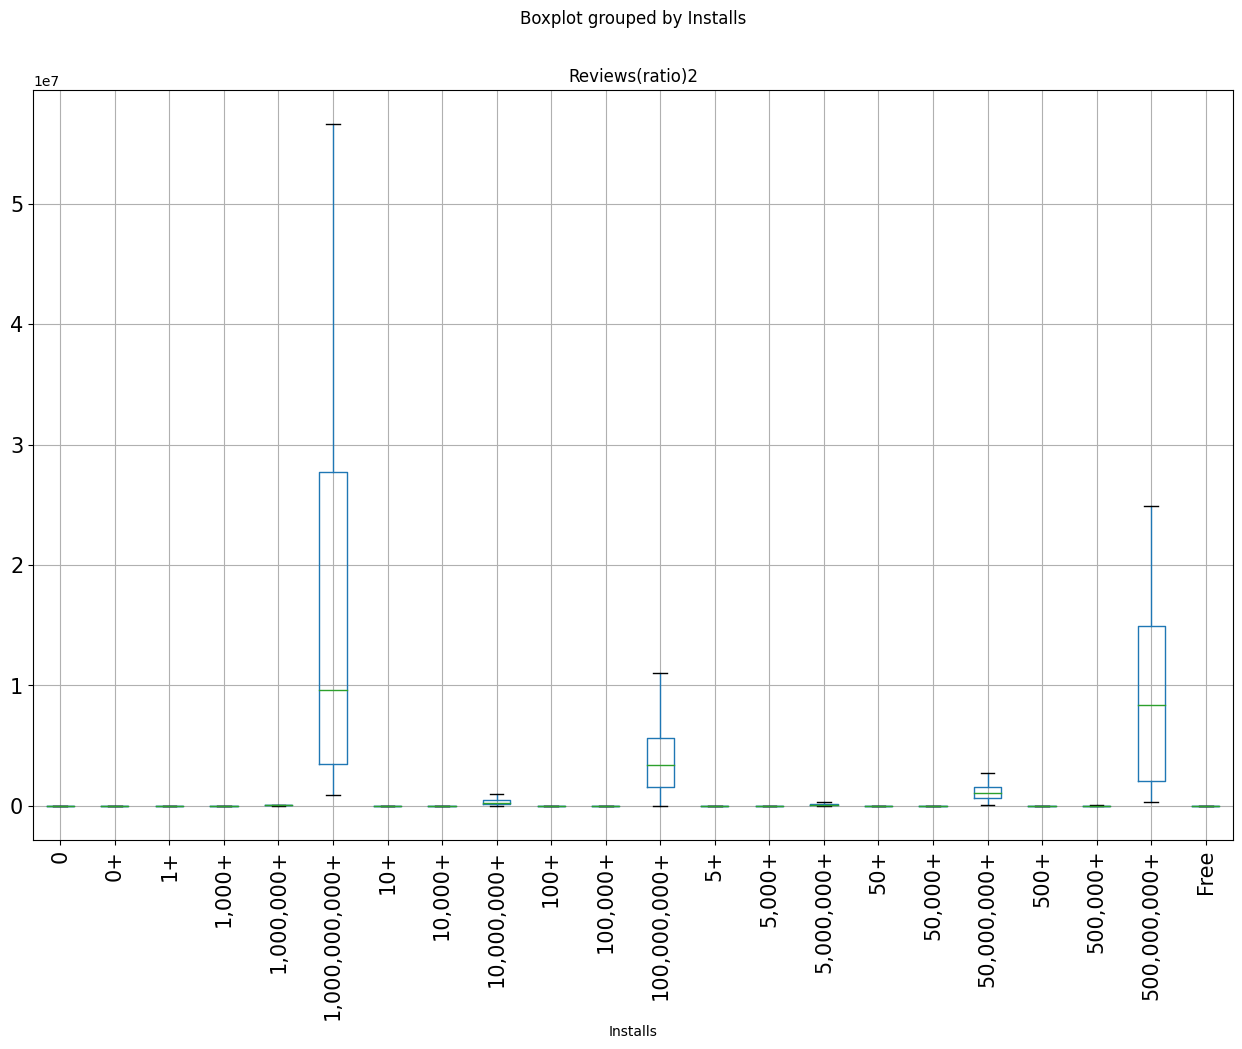

In [59]:
boxplot = Data.boxplot(column = 'Reviews(ratio)2', by = 'Installs', rot=90, fontsize=15, showfliers=False, figsize=(15, 10))

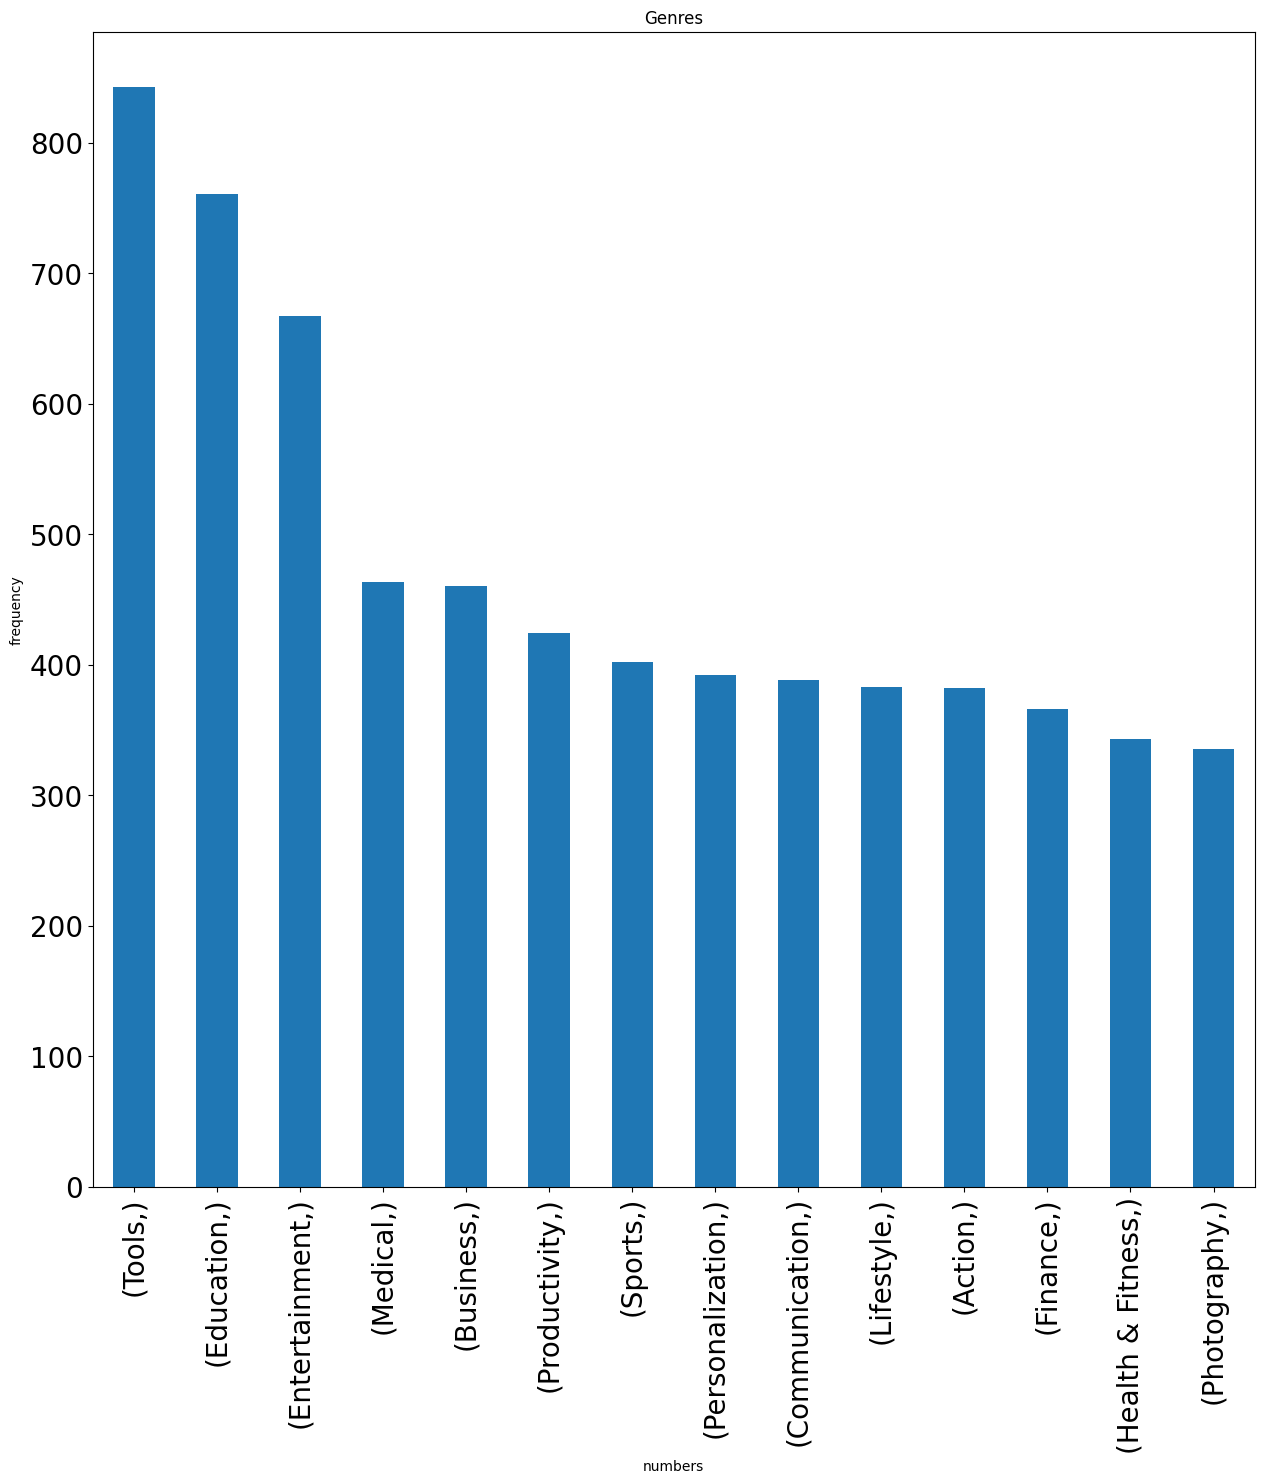

In [110]:
list_genre = []
for ii in Data['Genres']:
  list_genre.extend(ii.split(";"))

fig, ax = plt.subplots(figsize=(15, 15))
list_genre = pd.DataFrame(list_genre).value_counts()
list_genre[list_genre>300].plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency', title="Genres", fontsize= 20)
plt.show()

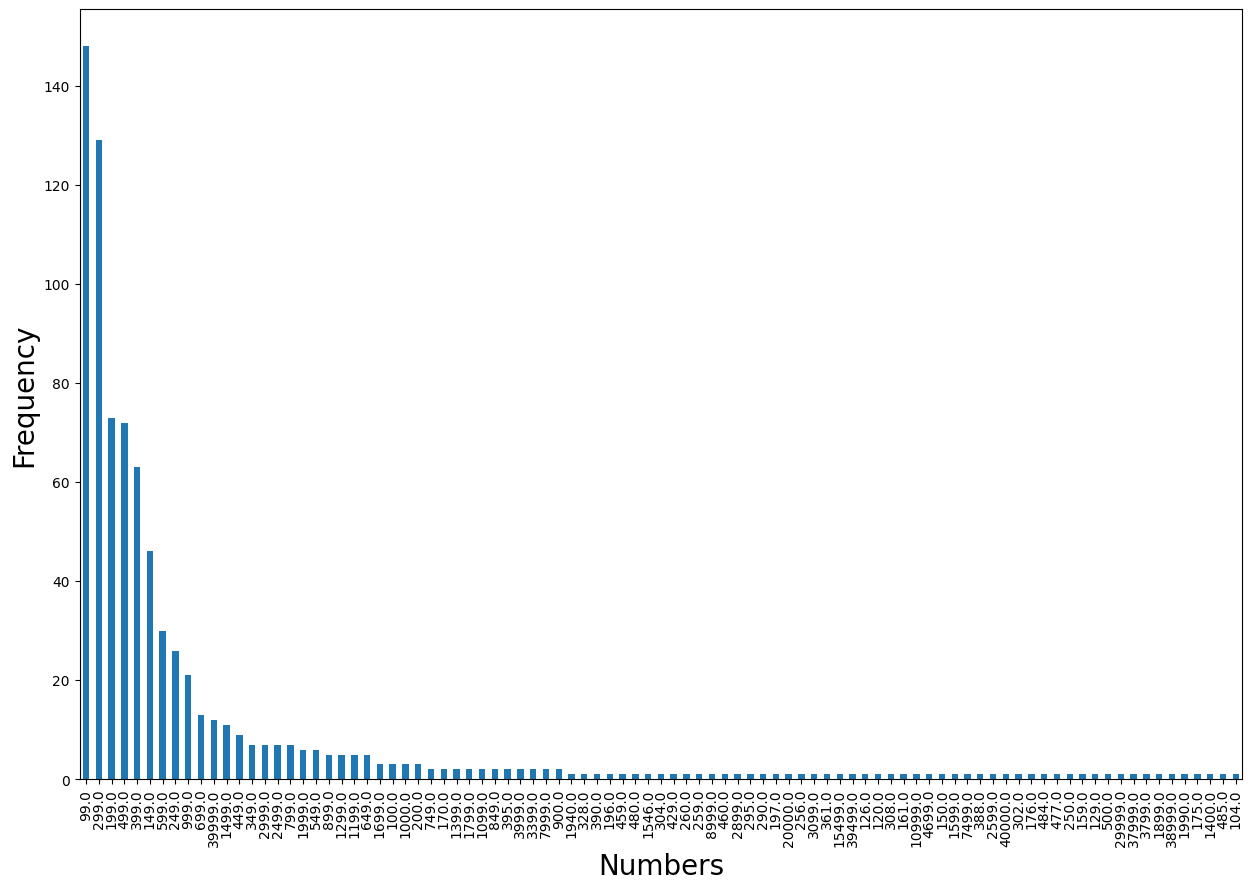

In [78]:
Data['Price(interval)2'] = Data['Price(interval)'].str.replace(r'\D', '')
Data['Price(interval)2'] = pd.to_numeric(Data['Price(interval)2'], errors='coerce')
#Data['Price(interval)2'] = Data['Price(interval)2'].astype(float, errors='ignore')
fig, ax = plt.subplots(figsize=(15, 10))
Data['Price(interval)2'][Data['Price(interval)2']>0].value_counts().plot(ax=ax, kind='bar', fontsize= 10)
plt.xlabel('Numbers', fontsize=20)
plt.ylabel('Frequency' ,fontsize=20)
plt.show()

<AxesSubplot: xlabel='month'>

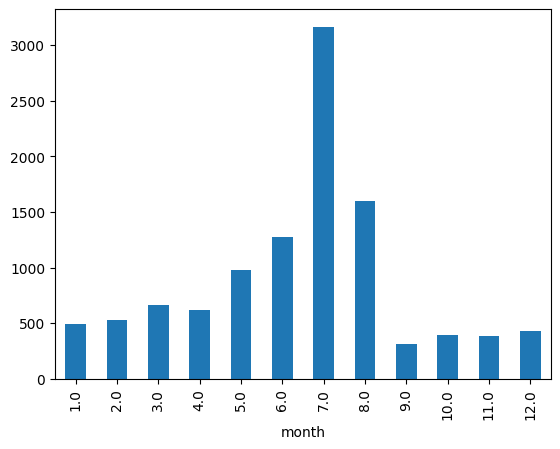

In [106]:

Data['Last Updated2'] = pd.to_datetime(Data['Last Updated'], errors='coerce')
Data['year'] = Data["Last Updated2"].dt.year
Data['month'] = Data["Last Updated2"].dt.month
# Last Updated
Data['month'].groupby(Data['month']).count().plot(kind="bar")


<AxesSubplot: xlabel='year'>

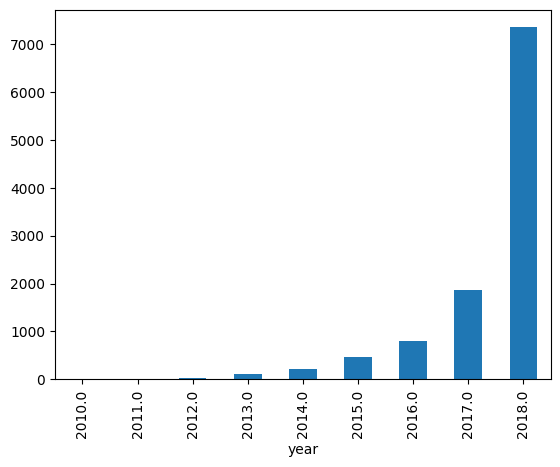

In [107]:
Data['year'].groupby(Data['year']).count().plot(kind="bar")
